In [1]:
import gzip
import json
import re
import os
import sys
import numpy as np
import pandas as pd

## Tester opens for columns

In [2]:
# Function to process a chunk of data
def process_data(chunk, columns=None):
    # If columns is not None, keep only those columns
    if columns is not None:
        chunk = chunk[columns]
    return chunk

# Function to read data in chunks and process each chunk
def load_data(file_name, head = None, columns=None, chunksize = 1000):
    chunks = []
    count = 0
    with gzip.open(file_name) as fin:
        for chunk in pd.read_json(fin, lines=True, chunksize=chunksize):
            # Process the chunk
            processed_chunk = process_data(chunk, columns)
            chunks.append(processed_chunk)
            
            count += 1
            # break if reaches the head-th chunk
            if (head is not None) and (count > head):
                break

    # Combine all chunks into a single DataFrame
    df = pd.concat(chunks, ignore_index=True)
    
    return df

In [5]:
DIR = 'C:\\Users\\jesse\\Documents\\GitHub\\vanity_sizing_project\\data\\'

In [7]:
modcloth = load_data(DIR+'modcloth_final_data.json.gz',head=1, chunksize=100)
modcloth

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36.0,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,8,4.0,b,NaN,36.0,outerwear,NaN,5ft 8in,Jennifer,just right,fit,727820,8.5,average,Cute jacket!,Cute jacket!
82786,807722,NaN,12,5.0,ddd/f,NaN,34.0,outerwear,NaN,5ft 5in,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,NaN,12,5.0,dddd/g,36.0,32.0,outerwear,NaN,5ft 4in,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,NaN,12,4.0,NaN,NaN,NaN,outerwear,NaN,5ft 3in,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


In [10]:
modcloth.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width'],
      dtype='object')

In [5]:
rtr = load_data(DIR+'renttherunway_final_data.json.gz',head=1, chunksize=100)
rtr

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,small,912090,34b,182915,108lbs,8,wedding,"The dress fit like a glove - I wore the 6, and...",petite,"I got many compliments on the dress, and was o...",dress,"5' 2""",12,56.0,"October 1, 2014"
196,fit,557692,NaN,2478188,135lbs,10,party,It can be a little short although it has short...,NaN,Was comfortable but cute for my Karaoke party.,romper,"5' 5""",4,33.0,"June 12, 2016"
197,fit,302239,36d,1551720,165lbs,10,wedding,This dress fit perfectly. No issue in the hip ...,hourglass,Great dress! Lots of compliments!,dress,"5' 2""",24,31.0,"July 17, 2017"
198,fit,979614,34b,1420770,155lbs,10,wedding,"Flattering fit, comfortable, great color",pear,So many compliments!,dress,"5' 1""",12,26.0,"November 3, 2014"


In [12]:
rtr.columns

Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')

Would keep all. Thoughts here -- could do something with how people feel? Not sure of the spread of data...

## Larger opens

In [9]:
mod = load_data(DIR+'modcloth_final_data.json.gz')
mod

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36.0,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,8,4.0,b,NaN,36.0,outerwear,NaN,5ft 8in,Jennifer,just right,fit,727820,8.5,average,Cute jacket!,Cute jacket!
82786,807722,NaN,12,5.0,ddd/f,NaN,34.0,outerwear,NaN,5ft 5in,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,NaN,12,5.0,dddd/g,36.0,32.0,outerwear,NaN,5ft 4in,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,NaN,12,4.0,NaN,NaN,NaN,outerwear,NaN,5ft 3in,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


In [10]:
#print out mod summary
print(mod.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [12]:
summary = pd.DataFrame(mod.dtypes, columns=['dtypes'])
summary = summary.reset_index()
summary['Name'] = summary['index']
summary = summary[['Name','dtypes']]
summary['Missing'] = mod.isnull().sum().values    
summary['Uniques'] = mod.nunique().values
summary['First Value'] = mod.loc[0].values
summary['Second Value'] = mod.loc[1].values
summary['Third Value'] = mod.loc[2].values

summary

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,item_id,int64,0,1378,123373,123373,123373
1,waist,float64,79908,31,29.0,31.0,30.0
2,size,int64,0,29,7,13,7
3,quality,float64,68,5,5.0,3.0,2.0
4,cup size,object,6255,12,d,b,b
5,hips,float64,26726,31,38.0,30.0,NaN
6,bra size,float64,6018,11,34.0,36.0,32.0
7,category,object,0,7,new,new,new
8,bust,object,70936,62,36.0,NaN,NaN
9,height,object,1107,41,5ft 6in,5ft 2in,5ft 7in


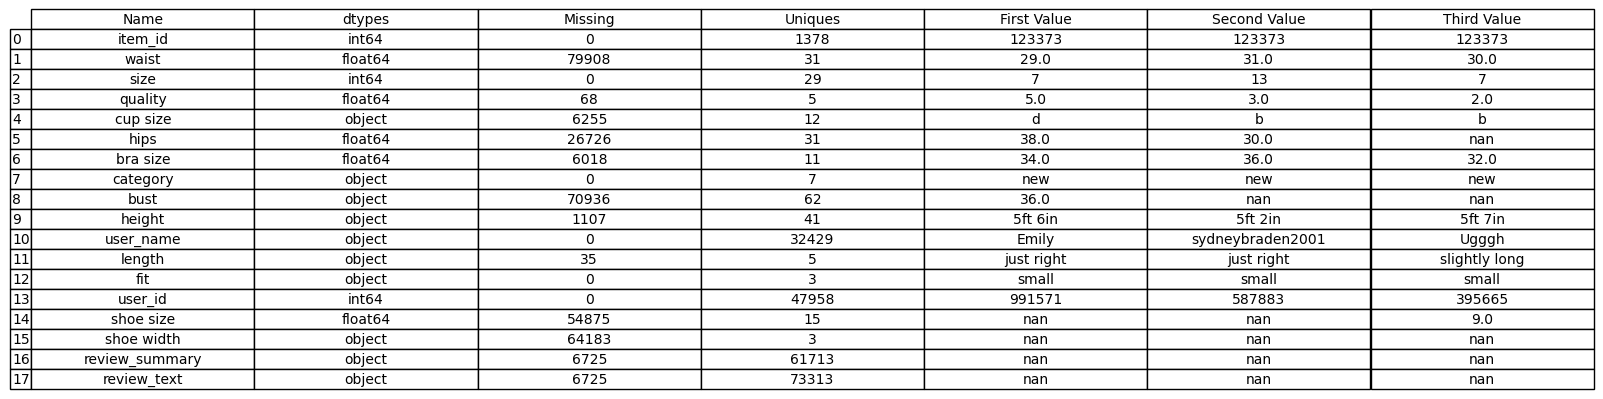

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

fig, ax = plt.subplots(figsize=(12, 4)) # set size frame
ax.axis('off')
tab = table(ax, summary, loc='center', cellLoc = 'center', colWidths=[0.2]*len(summary.columns))

tab.auto_set_font_size(False) 
tab.set_fontsize(10) 
tab.scale(1.2, 1.2) 

plt.savefig('summary.png')

In [15]:
rtr = load_data(DIR+'renttherunway_final_data.json.gz')
rtr

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


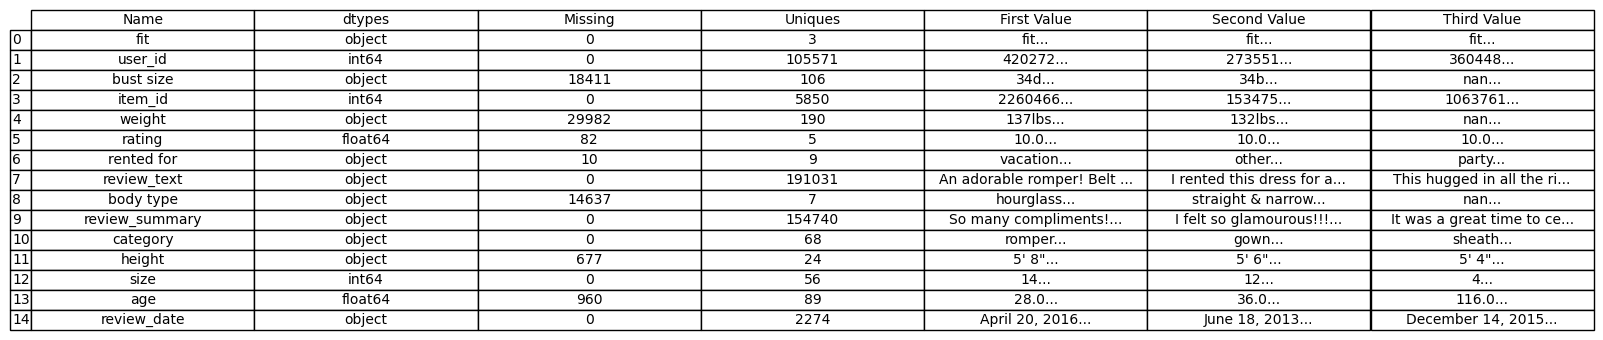

: 

In [21]:
summary = pd.DataFrame(rtr.dtypes, columns=['dtypes'])
summary = summary.reset_index()
summary['Name'] = summary['index']
summary = summary[['Name','dtypes']]
summary['Missing'] = rtr.isnull().sum().values    
summary['Uniques'] = rtr.nunique().values
summary['First Value'] = rtr.loc[0].values
summary['Second Value'] = rtr.loc[1].values
summary['Third Value'] = rtr.loc[2].values
summary['First Value'] = summary['First Value'].astype(str).str.slice(0, 25) + '...'
summary['Second Value'] = summary['Second Value'].astype(str).str.slice(0, 25) + '...'
summary['Third Value'] = summary['Third Value'].astype(str).str.slice(0, 25) + '...'

summary
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

fig, ax = plt.subplots(figsize=(12, 4)) # set size frame
ax.axis('off')
tab = table(ax, summary, loc='center', cellLoc = 'center', colWidths=[0.2]*len(summary.columns))

tab.auto_set_font_size(False) 
tab.set_fontsize(10) 
tab.scale(1.2, 1.2) 

plt.savefig('summary.png')

In [22]:
#rtr review date to datetime
rtr['review_date'] = pd.to_datetime(rtr['review_date'])
rtr['review_date'].head()

0   2016-04-20
1   2013-06-18
2   2015-12-14
3   2014-02-12
4   2016-09-26
Name: review_date, dtype: datetime64[ns]

In [27]:
#rtr review data years value counts
rtr['review_date'].dt.year.value_counts()

review_date
2017    67871
2016    51361
2015    30596
2014    28269
2013     9617
2012     3365
2018     1255
2011      209
2010        1
Name: count, dtype: int64

Could do extracting self perception and body image from reviews of clothing and then explore how changed over time and what else might be influencing it!